In [1]:
!pip3 install tweepy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install nltk
import nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install wordcloud
from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import tweepy
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes             import MultinomialNB
from sklearn                         import metrics
from sklearn.model_selection         import cross_val_predict
from sklearn.ensemble                import RandomForestClassifier
from google.colab                    import drive
from nltk.corpus                     import stopwords
nltk.download('punkt')
from nltk.tokenize                   import word_tokenize
import nltk
nltk.download('vader_lexicon')
from collections import Counter
from nltk.tag import pos_tag

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [5]:
#Chave
bearer_token = "AAAAAAAAAAAAAAAAAAAAAGJrlgEAAAAAbwqHxRmdRHG1qqeZTzx7OrESAig%3D4QiKcBbjpuEmOXMRala40QU0D2QSEWEPIVyIRKcjlG29JDgACA"

client = tweepy.Client(bearer_token=bearer_token)

In [6]:
df2 = pd.DataFrame(columns=['ID', 'text'])

In [7]:
public_tweets = tweepy.Paginator(client.search_recent_tweets, query='eletrobras', 
                              max_results=100).flatten(limit=2000)

In [8]:
analysis = None

In [9]:
count = 0
for tweet in public_tweets:
  analysis = TextBlob(tweet.text)
  
  df2.loc[count] = [tweet.id]+[tweet.text]
  
  count += 1

In [10]:
df2.head(100)

,ID,text
0,1637812051006353409,RT @A_MelhorNoticia: 🇧🇷 Brasil:\nJanja é soció...
1,1637812009239453698,RT @A_MelhorNoticia: 🇧🇷 Brasil:\nJanja é soció...
2,1637812007981178882,RT @A_MelhorNoticia: 🇧🇷 Brasil:\nJanja é soció...
3,1637811966889676802,RT @A_MelhorNoticia: 🇧🇷 Brasil:\nJanja é soció...
4,1637811934274674693,RT @A_MelhorNoticia: 🇧🇷 Brasil:\nJanja é soció...
...,...,...
95,1637795633695281153,RT @A_MelhorNoticia: 🇧🇷 Brasil:\nJanja é soció...
96,1637795248108601348,RT @A_MelhorNoticia: 🇧🇷 Brasil:\nJanja é soció...
97,1637795138121482243,@marcelogenuel @requiaooficial kkkkkkkkkkk Oh ...
98,1637795069997510656,RT @A_MelhorNoticia: 🇧🇷 Brasil:\nJanja é soció...


In [11]:
# Essa expressão regular remove toda a pontuação
punc_re = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
df2['text'] = df2.text.map(punc_re)

In [12]:
#faz uso do nltk.download('punkt')
#from nltk.tokenize import word_tokenize

df2['tokens'] = df2.text.map(word_tokenize)
df2.head()

,ID,text,tokens
0,1637812051006353409,RT A MelhorNoticia 🇧🇷 Brasil \nJanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s..."
1,1637812009239453698,RT A MelhorNoticia 🇧🇷 Brasil \nJanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s..."
2,1637812007981178882,RT A MelhorNoticia 🇧🇷 Brasil \nJanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s..."
3,1637811966889676802,RT A MelhorNoticia 🇧🇷 Brasil \nJanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s..."
4,1637811934274674693,RT A MelhorNoticia 🇧🇷 Brasil \nJanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s..."


In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [14]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
from nltk.tokenize import TweetTokenizer


In [16]:
sia = SentimentIntensityAnalyzer()

In [17]:
def analisar_sentimento2(texto):
    tokens = TweetTokenizer(texto)
    score = sia.polarity_scores(texto)
    return score['compound']


In [18]:
df2['Pontuacao2'] = df2['text'].apply(analisar_sentimento2)

In [19]:
df2.head(16)

,ID,text,tokens,Pontuacao2
0,1637812051006353409,RT A MelhorNoticia 🇧🇷 Brasil \nJanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.000
1,1637812009239453698,RT A MelhorNoticia 🇧🇷 Brasil \nJanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.000
2,1637812007981178882,RT A MelhorNoticia 🇧🇷 Brasil \nJanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.000
3,1637811966889676802,RT A MelhorNoticia 🇧🇷 Brasil \nJanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.000
4,1637811934274674693,RT A MelhorNoticia 🇧🇷 Brasil \nJanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.000
5,1637811922014728195,RT BitucaSalim Lançamento da Frente Parlamen...,"[RT, BitucaSalim, Lançamento, da, Frente, Parl...",0.000
6,1637811857904881664,RT jhzago O Povo Brasileiro tem que exigir a...,"[RT, jhzago, O, Povo, Brasileiro, tem, que, ex...",0.000
7,1637811038849581056,RT IvanValente A Eletrobras produz um terço ...,"[RT, IvanValente, A, Eletrobras, produz, um, t...",0.000
8,1637810814278148100,RT IvanValente A Eletrobras produz um terço ...,"[RT, IvanValente, A, Eletrobras, produz, um, t...",0.000
9,1637810555913224197,RT Shirlanlhp Final do Governo Temer Equator...,"[RT, Shirlanlhp, Final, do, Governo, Temer, Eq...",0.000


In [20]:
# Define uma função de mapeamento
def mapear_valor(valor):
    if valor > 0:
        return 'Positivo'
    elif valor < 0:
        return 'Negativo'
    else:
        return 'Neutro'


In [21]:
df2['Pontuacao2'] = df2['Pontuacao2'].astype(float)

In [22]:
df2.head()

,ID,text,tokens,Pontuacao2
0,1637812051006353409,RT A MelhorNoticia 🇧🇷 Brasil \nJanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0
1,1637812009239453698,RT A MelhorNoticia 🇧🇷 Brasil \nJanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0
2,1637812007981178882,RT A MelhorNoticia 🇧🇷 Brasil \nJanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0
3,1637811966889676802,RT A MelhorNoticia 🇧🇷 Brasil \nJanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0
4,1637811934274674693,RT A MelhorNoticia 🇧🇷 Brasil \nJanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0


In [23]:
df2['rotulos'] = df2['Pontuacao2'].apply(mapear_valor)

In [24]:
df2.head()

,ID,text,tokens,Pontuacao2,rotulos
0,1637812051006353409,RT A MelhorNoticia 🇧🇷 Brasil \nJanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0,Neutro
1,1637812009239453698,RT A MelhorNoticia 🇧🇷 Brasil \nJanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0,Neutro
2,1637812007981178882,RT A MelhorNoticia 🇧🇷 Brasil \nJanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0,Neutro
3,1637811966889676802,RT A MelhorNoticia 🇧🇷 Brasil \nJanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0,Neutro
4,1637811934274674693,RT A MelhorNoticia 🇧🇷 Brasil \nJanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0,Neutro


In [25]:
df2.iloc[4]

ID                                          1637811934274674693
text          RT  A MelhorNoticia  🇧🇷 Brasil \nJanja é soció...
tokens        [RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...
Pontuacao2                                                  0.0
rotulos                                                  Neutro
Name: 4, dtype: object

In [26]:
# Essa expressão regular remove todas as palavras com números e também torna todas as palavras em minúsculas
lower_alpha = lambda x: re.sub(r"""\w*\d\w*""", ' ', x.lower())
df2['text'] = df2.text.map(lower_alpha)

In [27]:
df2.head()

,ID,text,tokens,Pontuacao2,rotulos
0,1637812051006353409,rt a melhornoticia 🇧🇷 brasil \njanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0,Neutro
1,1637812009239453698,rt a melhornoticia 🇧🇷 brasil \njanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0,Neutro
2,1637812007981178882,rt a melhornoticia 🇧🇷 brasil \njanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0,Neutro
3,1637811966889676802,rt a melhornoticia 🇧🇷 brasil \njanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0,Neutro
4,1637811934274674693,rt a melhornoticia 🇧🇷 brasil \njanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0,Neutro


In [28]:
# Isso cria uma lista enorme combinando todos os valores de tokens
word_list = sum(df2.tokens.tolist(), [])

word_list[:10]

['RT',
 'A',
 'MelhorNoticia',
 '🇧🇷',
 'Brasil',
 'Janja',
 'é',
 'socióloga',
 'já',
 'foi']

In [29]:
# Estas são as etapas para encontrar as palavras mais comuns

#from collections import Counter

# Converte a lista em um dicionário com contagem de valores
word_counts = Counter(word_list)

# Inverter a chave / valores no dicionário para classificarReverter a chave / valores no dicionário para classificar
word_counts = list(zip(word_counts.values(), word_counts.keys()))

# Classifique a lista por contagem
word_counts = sorted(word_counts, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts[:10]

[(1803, 'na'),
 (1711, 'RT'),
 (1637, 'já'),
 (1615, 'Eletrobras'),
 (1598, 'e'),
 (1506, 'da'),
 (1313, 'é'),
 (1280, 'a'),
 (1256, 'A'),
 (1228, 'Brasil')]

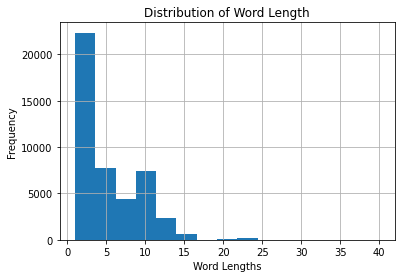

In [30]:
# A distribuição dos comprimentos das palavras
word_lengths = pd.Series([len(x) for x in word_list])

ax = word_lengths.hist(bins=15)
ax.set(xlabel='Word Lengths', ylabel='Frequency', title='Distribution of Word Length');

In [31]:
word_counts[:10]

[(1803, 'na'),
 (1711, 'RT'),
 (1637, 'já'),
 (1615, 'Eletrobras'),
 (1598, 'e'),
 (1506, 'da'),
 (1313, 'é'),
 (1280, 'a'),
 (1256, 'A'),
 (1228, 'Brasil')]

In [32]:
# Remova as stop words
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = stopwords.words('portuguese')
stop_words.append('co')
stop_words.append('t')
stop_words.append('https')
stop_words.append('rt')
stop_words.append('a')
stop_words.append('e')
stop_words.append('o')
stop_words.append('de')
stop_words.append('com')

stop_lambda = lambda x: [y for y in x if y not in stop_words]
df2['tokens_stop'] = df2.tokens.apply(stop_lambda)
df2.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,ID,text,tokens,Pontuacao2,rotulos,tokens_stop
0,1637812051006353409,rt a melhornoticia 🇧🇷 brasil \njanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0,Neutro,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, soci..."
1,1637812009239453698,rt a melhornoticia 🇧🇷 brasil \njanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0,Neutro,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, soci..."
2,1637812007981178882,rt a melhornoticia 🇧🇷 brasil \njanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0,Neutro,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, soci..."
3,1637811966889676802,rt a melhornoticia 🇧🇷 brasil \njanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0,Neutro,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, soci..."
4,1637811934274674693,rt a melhornoticia 🇧🇷 brasil \njanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0,Neutro,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, soci..."


In [33]:
word_list_stop = sum(df2.tokens_stop.tolist(), [])

In [34]:
word_list_stop[:10]

['RT',
 'A',
 'MelhorNoticia',
 '🇧🇷',
 'Brasil',
 'Janja',
 'socióloga',
 'professora',
 'universitária',
 'trabalhou']

In [35]:
# partes de speech tagging
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
pos_lambda = lambda x: nltk.pos_tag(x)
df2['tokens_pos'] = (df2.tokens_stop.apply(pos_lambda))
df2.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,ID,text,tokens,Pontuacao2,rotulos,tokens_stop,tokens_pos
0,1637812051006353409,rt a melhornoticia 🇧🇷 brasil \njanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0,Neutro,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, soci...","[(RT, VB), (A, DT), (MelhorNoticia, NNP), (🇧🇷,..."
1,1637812009239453698,rt a melhornoticia 🇧🇷 brasil \njanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0,Neutro,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, soci...","[(RT, VB), (A, DT), (MelhorNoticia, NNP), (🇧🇷,..."
2,1637812007981178882,rt a melhornoticia 🇧🇷 brasil \njanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0,Neutro,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, soci...","[(RT, VB), (A, DT), (MelhorNoticia, NNP), (🇧🇷,..."
3,1637811966889676802,rt a melhornoticia 🇧🇷 brasil \njanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0,Neutro,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, soci...","[(RT, VB), (A, DT), (MelhorNoticia, NNP), (🇧🇷,..."
4,1637811934274674693,rt a melhornoticia 🇧🇷 brasil \njanja é soció...,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, é, s...",0.0,Neutro,"[RT, A, MelhorNoticia, 🇧🇷, Brasil, Janja, soci...","[(RT, VB), (A, DT), (MelhorNoticia, NNP), (🇧🇷,..."


In [36]:
from collections import Counter

# Converte a lista em um dicionário com contagem de valores (usando o stop)
word_counts_stop = Counter(word_list_stop)
a = word_counts_stop

# Inverta a chave / valores no dicionário para classificar
word_counts_stop = list(zip(word_counts_stop.values(), word_counts_stop.keys()))

# Classifique a lista por contagem
word_counts_stop = sorted(word_counts_stop, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_stop[:10]

[(1711, 'RT'),
 (1615, 'Eletrobras'),
 (1256, 'A'),
 (1228, 'Brasil'),
 (810, 'E'),
 (804, 'Itaipu'),
 (802, 'energia'),
 (797, '🇧🇷'),
 (797, 'MelhorNoticia'),
 (794, 't…')]

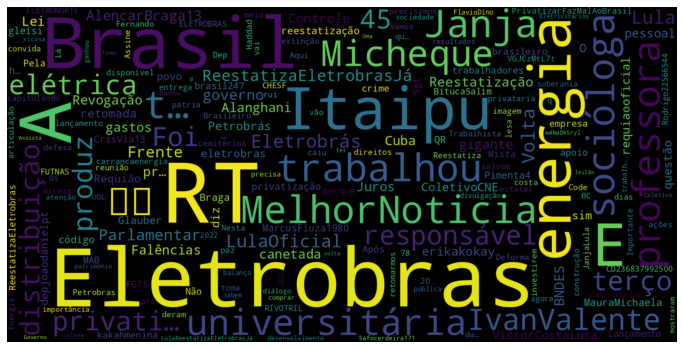

In [37]:
text = word_list_stop
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(a)
# wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
file_name = 'Basededados_twitter.xlsx'
df2.to_excel(file_name)

In [39]:
comentarios = df2["text"].values
comentarios

array(['rt  a melhornoticia  🇧🇷 brasil \njanja é socióloga  já foi professora universitária  já trabalhou na itaipu e na eletrobras  e a micheque  t…',
       'rt  a melhornoticia  🇧🇷 brasil \njanja é socióloga  já foi professora universitária  já trabalhou na itaipu e na eletrobras  e a micheque  t…',
       'rt  a melhornoticia  🇧🇷 brasil \njanja é socióloga  já foi professora universitária  já trabalhou na itaipu e na eletrobras  e a micheque  t…',
       ...,
       'rt  ivanvalente  a eletrobras produz um terço da energia elétrica do brasil e é responsável por    da distribuição de energia  foi privati…',
       'rt  ivanvalente  a eletrobras produz um terço da energia elétrica do brasil e é responsável por    da distribuição de energia  foi privati…',
       'rt     requião diz que sua questão com lula não é pessoal  mas sim a retomada da petrobrás e da eletrobrás\nhttps   t co  '],
      dtype=object)

In [40]:
classes = df2["rotulos"].values
classes

array(['Neutro', 'Neutro', 'Neutro', ..., 'Neutro', 'Neutro', 'Neutro'],
      dtype=object)

In [41]:
vectorizer = CountVectorizer(analyzer = "word")
freq_comentarios = vectorizer.fit_transform(comentarios)
modelo = MultinomialNB()
modelo.fit(freq_comentarios, classes)



MultinomialNB()

In [42]:
#teste_modelo = ['querido']
#freq_testes = vectorizer.transform(teste_modelo)
#modelo.predict(freq_testes)

In [43]:
resultados = cross_val_predict(modelo, freq_comentarios, classes, cv = 10)
resultados

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


array(['Neutro', 'Neutro', 'Neutro', ..., 'Neutro', 'Neutro', 'Neutro'],
      dtype='<U8')

In [44]:
metrics.accuracy_score(classes, resultados)

0.893

In [45]:
##sentimentos = ["positivo","neutro","negativo"]

In [46]:
print(metrics.classification_report(classes, resultados))

              precision    recall  f1-score   support

    Negativo       0.36      0.97      0.53       117
      Neutro       1.00      0.89      0.94      1876
    Positivo       0.12      0.29      0.17         7

    accuracy                           0.89      2000
   macro avg       0.50      0.72      0.55      2000
weighted avg       0.96      0.89      0.92      2000



In [47]:
print(pd.crosstab(classes, resultados, rownames = ["Real"], colnames=["Predito"], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       114       0         3   117
Neutro         195    1670        11  1876
Positivo         5       0         2     7
All            314    1670        16  2000


In [48]:
#usando melhoria com Bigrams
vectorizer = CountVectorizer(ngram_range = (1, 2))
freq_comentarios = vectorizer.fit_transform(comentarios)

modelo = MultinomialNB()
modelo.fit(freq_comentarios, classes)

MultinomialNB()

In [49]:
resultados = cross_val_predict(modelo, freq_comentarios, classes, cv = 10)
resultados

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


array(['Neutro', 'Neutro', 'Neutro', ..., 'Neutro', 'Neutro', 'Neutro'],
      dtype='<U8')

In [50]:
metrics.accuracy_score(classes, resultados)

0.831

In [51]:
print(metrics.classification_report(classes, resultados))

              precision    recall  f1-score   support

    Negativo       0.31      0.84      0.45       117
      Neutro       1.00      0.83      0.91      1876
    Positivo       0.05      0.86      0.09         7

    accuracy                           0.83      2000
   macro avg       0.45      0.84      0.48      2000
weighted avg       0.96      0.83      0.88      2000



 Modelo Com Randow Forest

In [52]:
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None,stop_words = stop_words, max_features = 5000)

In [53]:
train_data_features = vectorizer.fit_transform(comentarios)
train_data_features

<2000x1752 sparse matrix of type '<class 'numpy.int64'>'
	with 21306 stored elements in Compressed Sparse Row format>

In [54]:
forest = RandomForestClassifier(n_estimators = 100)
forest

RandomForestClassifier()

In [55]:
class_sentimentos = df2["rotulos"].values
class_sentimentos

array(['Neutro', 'Neutro', 'Neutro', ..., 'Neutro', 'Neutro', 'Neutro'],
      dtype=object)

In [56]:
forest = forest.fit(train_data_features, class_sentimentos)
forest

RandomForestClassifier()

In [57]:
test_data_features_resultados = vectorizer.transform(comentarios)
test_data_features_resultados

<2000x1752 sparse matrix of type '<class 'numpy.int64'>'
	with 21306 stored elements in Compressed Sparse Row format>

In [58]:
resultados = forest.predict(test_data_features_resultados)
resultados

array(['Neutro', 'Neutro', 'Neutro', ..., 'Neutro', 'Neutro', 'Neutro'],
      dtype=object)

In [59]:
metrics.accuracy_score(classes, resultados)

1.0

In [60]:
print(metrics.classification_report(classes, resultados))

              precision    recall  f1-score   support

    Negativo       1.00      1.00      1.00       117
      Neutro       1.00      1.00      1.00      1876
    Positivo       1.00      1.00      1.00         7

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [61]:
print(pd.crosstab(classes, resultados, rownames = ["Real"], colnames = ["Predito"], margins = True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       117       0         0   117
Neutro           0    1876         0  1876
Positivo         0       0         7     7
All            117    1876         7  2000
